In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from astropy.io import fits
from sklearn.tree import DecisionTreeRegressor

In [5]:
#Load a fits spectra file from sdss with with loop
filename='spec-1678-53433-0001.fits'
with fits.open(filename) as f:
    specdata=f[1].data
    header_data=f[0].header

In [8]:
specdata

FITS_rec([(12.792082 , 3.5817, 0.10687421, 0, 0, 1.2967558 , 13.418482 , 12.464617),
          ( 7.4492755, 3.5818, 0.11202636, 0, 0, 1.2965097 , 13.370382 , 13.004056),
          ( 9.731672 , 3.5819, 0.1062034 , 0, 0, 1.2962604 , 12.977432 , 12.24745 ),
          ...,
          ( 8.67159  , 3.9636, 0.6566302 , 0, 0, 0.8023327 ,  2.0873702,  9.301501),
          ( 6.5539784, 3.9637, 0.67164165, 0, 0, 0.8028465 ,  2.10976  ,  8.614114),
          ( 7.4166584, 3.9638, 0.63224053, 0, 0, 0.80336064,  2.157883 ,  8.887125)],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [89]:
y_sky=specdata['sky']
x=specdata['loglam'].reshape(-1,1)

In [99]:
#x_train, x_test, y_train, y_test = train_test_split(x, y_sky, test_size=0.2, random_state=42)


In [117]:
# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=402, max_depth=10)  # You can tune max_depth or other hyperparameters
dt_model.fit(x, y_sky)

# Make predictions
y_pred_dt = dt_model.predict(x)

Text(0, 0.5, 'Model Flux')

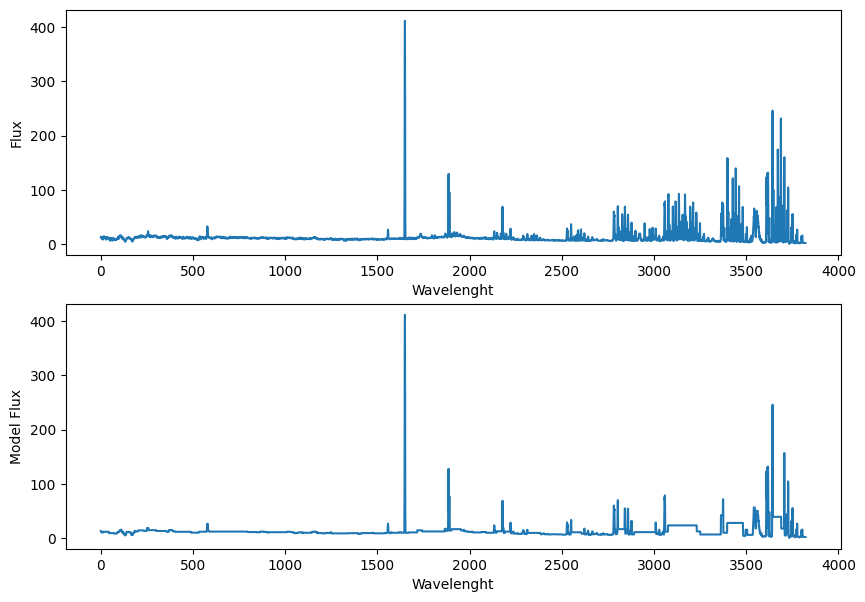

In [123]:
fig, ax=plt.subplots(nrows=2,ncols=1,figsize=(10,7))
ax[0].plot(y_sky)
ax[1].plot(y_pred_dt)
ax[0].set_xlabel('Wavelenght')
ax[0].set_ylabel('Flux')
ax[1].set_xlabel('Wavelenght')
ax[1].set_ylabel('Model Flux')